In [80]:
#First we import the necessary libraries.
#pywt is a wavelet transformation library which I found is easier to apply than manually coding functions up.
from __future__ import print_function
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
file_name = './sp500.csv'
price_cols = ['Open Price','High Price','Low Price','Close Price','Volume']
cols = ['Ntime', 'time', 'Close Price', 'Open Price', 'High Price', 'Low Price', 'Volume', 'MACD', 'CCI', 'ATR', 'BOLL', 'EMA20', 'MA10', 'MTM6', 'MA5', 'MTM12', 'ROC', 'SMI', 'WVAD', 'US Dollar Index', 'Federal Fund Rate']
ind_close = 0

In [82]:
#import stock price data as a csv file. 
#I used all the indicators described in the paper, and found that different combinations work for different financial markets.


df1=pd.read_csv(file_name, header= None)
df1

0       1            2           3           4          5   \
0        Ntime    time  Close Price  Open Price  High Price  Low Price   
1     20080701  733590      1284.91     1276.69     1285.31    1260.68   
2     20080702  733591      1261.52     1285.82     1292.17    1261.51   
3     20080703  733592       1262.9     1262.96     1271.48    1252.01   
4     20080707  733596      1252.31      1262.9     1273.95    1240.68   
5     20080708  733597       1273.7     1251.84     1274.17    1242.84   
6     20080709  733598      1244.69     1273.38     1277.36    1244.57   
7     20080710  733599      1253.39     1245.25     1257.65    1236.76   
8     20080711  733600      1239.49     1248.66     1257.27    1225.35   
9     20080714  733603       1228.3     1241.61      1253.5    1225.01   
10    20080715  733604      1214.91     1226.83     1234.35    1200.44   
11    20080716  733605      1245.36     1214.65     1245.52    1211.39   
12    20080717  733606      1260.32     1246.31     1262.31    1241.49   
13    20080718  733607      1260.68     1258.22     1262.23    1251.81   
14    20080721  733610         1260     1261.82     1267.74     1255.7   
15    20080722  733611         1277     1257.08     1277.42    1248.83   
16    20080723  733612      1282.19     1278.87     1291.17    1276.06   
17    20080724  733613      1252.54     1283.22     1283.22    1251.48   
18    20080725  733614      1257.76     1253.51     1263.23    1251.75   
19    20080728  733617      1234.37     1257.76     1260.09    1234.37   
20    20080729  733618       1263.2     1236.38      1263.2    1236.38   
21    20080730  733619      1284.26     1264.52     1284.33    1264.52   
22    20080731  733620      1267.38     1281.37     1284.93    1265.97   
23    20080801  733621      1260.31     1269.42     1270.52    1254.54   
24    20080804  733624      1249.01     1260.16     1260.49    1247.45   
25    20080805  733625      1284.88     1254.87     1284.88    1254.67   
26    20080806  733626      1289.19     1283.99     1291.67       1276   
27    20080807  733627      1266.07     1286.51     1286.51    1264.29   
28    20080808  733628      1296.32     1266.29     1297.85    1262.11   
29    20080811  733631      1305.32     1294.42     1313.15    1291.41   
...        ...     ...          ...         ...         ...        ...   
2050  20160819  736561      2183.87     2184.24        2185    2175.13   
2051  20160822  736564      2182.64     2181.58     2185.15    2175.96   
2052  20160823  736565       2186.9     2187.81     2193.42     2186.8   
2053  20160824  736566      2175.44     2185.09     2186.66    2171.25   
2054  20160825  736567      2172.47     2173.29        2179    2169.74   
2055  20160826  736568      2169.04      2175.1     2187.94    2160.39   
2056  20160829  736571      2180.38     2170.19     2183.48    2170.19   
2057  20160830  736572      2176.12     2179.45     2182.27    2170.41   
2058  20160831  736573      2170.95     2173.56     2173.79    2161.35   
2059  20160901  736574      2170.86     2171.33     2173.56    2157.09   
2060  20160902  736575      2179.98     2177.49     2184.87    2173.59   
2061  20160906  736579      2186.48     2181.61     2186.57     2175.1   
2062  20160907  736580      2186.16     2185.17     2187.87    2179.07   
2063  20160908  736581       2181.3     2182.76     2184.94    2177.49   
2064  20160909  736582      2127.81     2169.08     2169.08    2127.81   
2065  20160912  736585      2159.04     2120.86      2163.3    2119.12   
2066  20160913  736586      2127.02     2150.47     2150.47    2120.27   
2067  20160914  736587      2125.77     2127.86     2141.33     2119.9   
2068  20160915  736588      2147.26     2125.36     2151.31    2122.36   
2069  20160916  736589      2139.16     2146.48     2146.48     2131.2   
2070  20160919  736592      2139.12     2143.99     2153.61    2135.91   
2071  20160920  736593      2139.76     2145.94      2150.8    2139.17   
2072  20160921  

In [125]:
#A couple of transformations to neatly label the data, and clearly index it. Notice how I index not using datetime but using conventional numbering.
#df1=df1.drop([0])
df1= pd.DataFrame(df1.values, columns=cols).iloc[1:]
#df1=df1.drop([0])


In [126]:
df1

Ntime    time Close Price Open Price High Price Low Price     Volume  \
1     20080701  733590     1284.91    1276.69    1285.31   1260.68     584629   
2     20080702  733591     1261.52    1285.82    1292.17   1261.51     527609   
3     20080703  733592      1262.9    1262.96    1271.48   1252.01     324759   
4     20080707  733596     1252.31     1262.9    1273.95   1240.68     526542   
5     20080708  733597      1273.7    1251.84    1274.17   1242.84     603411   
6     20080709  733598     1244.69    1273.38    1277.36   1244.57     518100   
7     20080710  733599     1253.39    1245.25    1257.65   1236.76     584043   
8     20080711  733600     1239.49    1248.66    1257.27   1225.35     674220   
9     20080714  733603      1228.3    1241.61     1253.5   1225.01     543486   
10    20080715  733604     1214.91    1226.83    1234.35   1200.44     736364   
11    20080716  733605     1245.36    1214.65    1245.52   1211.39  673863.04   
12    20080717  733606     1260.32    1246.31    1262.31   1241.49  736520.96   
13    20080718  733607     1260.68    1258.22    1262.23   1251.81     565328   
14    20080721  733610        1260    1261.82    1267.74    1255.7     463064   
15    20080722  733611        1277    1257.08    1277.42   1248.83     618023   
16    20080723  733612     1282.19    1278.87    1291.17   1276.06     670583   
17    20080724  733613     1252.54    1283.22    1283.22   1251.48     612798   
18    20080725  733614     1257.76    1253.51    1263.23   1251.75     467256   
19    20080728  733617     1234.37    1257.76    1260.09   1234.37     428296   
20    20080729  733618      1263.2    1236.38     1263.2   1236.38     541424   
21    20080730  733619     1284.26    1264.52    1284.33   1264.52     563133   
22    20080731  733620     1267.38    1281.37    1284.93   1265.97     534605   
23    20080801  733621     1260.31    1269.42    1270.52   1254.54     468487   
24    20080804  733624     1249.01    1260.16    1260.49   1247.45     456228   
25    20080805  733625     1284.88    1254.87    1284.88   1254.67     121931   
26    20080806  733626     1289.19    1283.99    1291.67      1276     487342   
27    20080807  733627     1266.07    1286.51    1286.51   1264.29     531938   
28    20080808  733628     1296.32    1266.29    1297.85   1262.11     496681   
29    20080811  733631     1305.32    1294.42    1313.15   1291.41     506731   
30    20080812  733632     1289.59    1304.79    1304.79   1285.64     471129   
...        ...     ...         ...        ...        ...       ...        ...   
2050  20160819  736561     2183.87    2184.24       2185   2175.13     308480   
2051  20160822  736564     2182.64    2181.58    2185.15   2175.96     277755   
2052  20160823  736565      2186.9    2187.81    2193.42    2186.8     304149   
2053  20160824  736566     2175.44    2185.09    2186.66   2171.25     308089   
2054  20160825  736567     2172.47    2173.29       2179   2169.74     296931   
2055  20160826  736568     2169.04     2175.1    2187.94   2160.39     334234   
2056  20160829  736571     2180.38    2170.19    2183.48   2170.19     265478   
2057  20160830  736572     2176.12    2179.45    2182.27   2170.41     301776   
2058  20160831  736573     2170.95    2173.56    2173.79   2161.35     376639   
2059  20160901  736574     2170.86    2171.33    2173.56   2157.09     315011   
2060  20160902  736575     2179.98    2177.49    2184.87   2173.59     309112   
2061  20160906  736579     2186.48    2181.61    2186.57    2175.1     344765   
2062  20160907  736580     2186.16    2185.17    2187.87   2179.07     331942   
2063  20160908  736581      2181.3    2182.76    2184.94   2177.49     335493   
2064  20160909  736582     2127.81    2169.08    2169.08   2127.81     423396   
2065  20160912  736585     2159.04    2120.86     2163.3   2119.12     401048   
2066  20160913  736586     2127.02    2150.47    2150.47   2120.27     414167   
2067  20160914  736587     2125.77    21

In [127]:
df1.columns

Index(['Ntime', 'time', 'Close Price', 'Open Price', 'High Price', 'Low Price',
       'Volume', 'MACD', 'CCI', 'ATR', 'BOLL', 'EMA20', 'MA10', 'MTM6', 'MA5',
       'MTM12', 'ROC', 'SMI', 'WVAD', 'US Dollar Index', 'Federal Fund Rate'],
      dtype='object')

In [128]:
#The data for some reason was an object type, which is why I apply this transform.No transforms applied to the date.#
df1[cols] = df1[cols].apply(pd.to_numeric, errors='ignore')
#df1[['open','high','low','close','volume',' MACD', 'CCI', 'ATR','BOLL', 'MA5','MA10','MTM6','MTM12', 'ROC','WVAD','beta_24m','turn']]=df1[['open','high','low','close','volume',' MACD', 'CCI', 'ATR','BOLL', 'MA5','MA10','MTM6','MTM12', 'ROC','WVAD','beta_24m','turn']].apply(pd.to_numeric, errors='ignore')

In [129]:

df1.dtypes

Ntime                  int64
time                   int64
Close Price          float64
Open Price           float64
High Price           float64
Low Price            float64
Volume               float64
MACD                 float64
CCI                  float64
ATR                  float64
BOLL                 float64
EMA20                float64
MA10                 float64
MTM6                 float64
MA5                  float64
MTM12                float64
ROC                  float64
SMI                  float64
WVAD                 float64
US Dollar Index      float64
Federal Fund Rate    float64
dtype: object

In [130]:
#Now I want to apply the wavelet transform on the OHLCV data , for which I create a new dataframe.
#Bear with me through the steps, it was a stepwise implementation of everything described in the paper,
#and I wanted to make sure I was doing everything that they said.

df3= df1[price_cols]
df3

Open Price  High Price  Low Price  Close Price     Volume
1        1276.69     1285.31    1260.68      1284.91  584629.00
2        1285.82     1292.17    1261.51      1261.52  527609.00
3        1262.96     1271.48    1252.01      1262.90  324759.00
4        1262.90     1273.95    1240.68      1252.31  526542.00
5        1251.84     1274.17    1242.84      1273.70  603411.00
6        1273.38     1277.36    1244.57      1244.69  518100.00
7        1245.25     1257.65    1236.76      1253.39  584043.00
8        1248.66     1257.27    1225.35      1239.49  674220.00
9        1241.61     1253.50    1225.01      1228.30  543486.00
10       1226.83     1234.35    1200.44      1214.91  736364.00
11       1214.65     1245.52    1211.39      1245.36  673863.04
12       1246.31     1262.31    1241.49      1260.32  736520.96
13       1258.22     1262.23    1251.81      1260.68  565328.00
14       1261.82     1267.74    1255.70      1260.00  463064.00
15       1257.08     1277.42    1248.83      1277.00  618023.00
16       1278.87     1291.17    1276.06      1282.19  670583.00
17       1283.22     1283.22    1251.48      1252.54  612798.00
18       1253.51     1263.23    1251.75      1257.76  467256.00
19       1257.76     1260.09    1234.37      1234.37  428296.00
20       1236.38     1263.20    1236.38      1263.20  541424.00
21       1264.52     1284.33    1264.52      1284.26  563133.00
22       1281.37     1284.93    1265.97      1267.38  534605.00
23       1269.42     1270.52    1254.54      1260.31  468487.00
24       1260.16     1260.49    1247.45      1249.01  456228.00
25       1254.87     1284.88    1254.67      1284.88  121931.00
26       1283.99     1291.67    1276.00      1289.19  487342.00
27       1286.51     1286.51    1264.29      1266.07  531938.00
28       1266.29     1297.85    1262.11      1296.32  496681.00
29       1294.42     1313.15    1291.41      1305.32  506731.00
30       1304.79     1304.79    1285.64      1289.59  471129.00
...          ...         ...        ...          ...        ...
2050     2184.24     2185.00    2175.13      2183.87  308480.00
2051     2181.58     2185.15    2175.96      2182.64  277755.00
2052     2187.81     2193.42    2186.80      2186.90  304149.00
2053     2185.09     2186.66    2171.25      2175.44  308089.00
2054     2173.29     2179.00    2169.74      2172.47  296931.00
2055     2175.10     2187.94    2160.39      2169.04  334234.00
2056     2170.19     2183.48    2170.19      2180.38  265478.00
2057     2179.45     2182.27    2170.41      2176.12  301776.00
2058     2173.56     2173.79    2161.35      2170.95  376639.00
2059     2171.33     2173.56    2157.09      2170.86  315011.00
2060     2177.49     2184.87    2173.59      2179.98  309112.00
2061     2181.61     2186.57    2175.10      2186.48  344765.00
2062     2185.17     2187.87    2179.07      2186.16  331942.00
2063     2182.76     2184.94    2177.49      2181.30  335493.00
2064     2169.08     2169.08    2127.81      2127.81  423396.00
2065     2120.86     2163.30    2119.12      2159.04  401048.00
2066     2150.47     2150.47    2120.27      2127.02  414167.00
2067     2127.86     2141.33    2119.90      2125.77  366410.00
2068     2125.36     2151.31    2122.36      2147.26  337372.00
2069     2146.48     2146.48    2131.20      2139.16  501436.00
2070     2143.99     2153.61    2135.91      2139.12  316300.00
2071     2145.94     2150.80    2139.17      2139.76  387137.00
2072     2144.58     2165.11    2139.57      2163.12  371209.00
2073     2170.94     2179.99    2170.94      2177.18  382690.00
2074     2173.29     2173.75    2163.97      2164.69  331719.00
2075     2158.54     2158.54    2145.04      2146.10  357811.00
2076     2146.04     2161.13    2141.55      2159.93  366113.00
2077     2161.85     2172.40    2151.79      2171.37  361908.00
2078     2168.90     2172.67    2145.20      2151.13  424922.00
2079     2156.51     2175.30    2156.51      2168.27  417334.00

[2079 rows x 5 columns]

In [131]:
df3.isnull().values.any()

False

In [132]:
#Since I was going to be using close values for the stock, I created a series of close prices from DF3.
#PyWt works on series values too, so this was a necessary step.
df3 = df3.rename(columns={'Close Price': 'close'})
a=df3.close.values[1:]
df3 = df3.rename(columns={'close': 'Close Price'})
a

array([1261.52, 1262.9 , 1252.31, ..., 2171.37, 2151.13, 2168.27])

In [133]:
a.shape

(2078,)

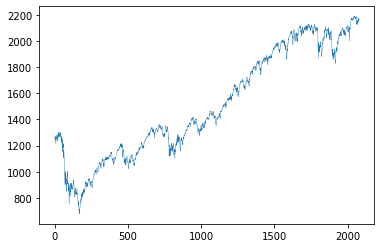

In [134]:
#Made a plot to visually see how the data was recreated. I saved it in the .svg format to 
#save the image in lossless format.
plt.plot(a,linewidth=0.4)
plt.savefig('./noisy.svg')
plt.show()

In [137]:
#Now that I have the original close price series isolated and plotted,I begin the transform process.
#I create a matrix of the OHLCV values and I begin.
b=df3.values

In [155]:
b.shape

(2079, 5)

In [145]:
coeffs= pywt.wavedec2(b, 'haar', mode='symmetric',level=2)

In [146]:
coeffs[-2] = tuple([np.zeros_like(v) for v in coeffs[-2]])

In [147]:
c=pywt.waverec2(coeffs,'haar')

In [148]:
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)

In [149]:
coeffs1[-2] = tuple([np.zeros_like(v) for v in coeffs1[-2]])

In [150]:
d=pywt.waverec2(coeffs1, 'haar')

In [157]:
d.shape

(2080, 6)

In [156]:
df2=pd.DataFrame({'open':d[:,0],'high':d[:,1],'low':d[:,2],'close':d[:,3],'volume':d[:,4]})

In [158]:
e=df2.close.values

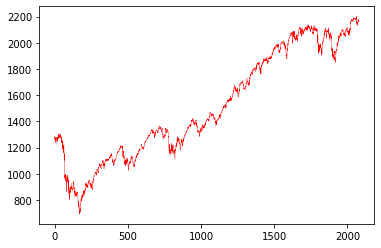

In [159]:
#That's the whole stepwise process of using wavelet transform.
#Every step is a separate cell to make sure I'm not messing anything up.
#The new series itself is not much different from the original series, a few differences.

plt.plot(e, linewidth=0.4, color='r')
plt.savefig('./reconstructed.svg')

In [160]:
e

array([1285.7425  , 1262.3525  , 1278.9125  , ..., 2159.288125,
       2168.910625, 2168.910625])

In [161]:
df2

open         high          low        close     volume
0     1259.680000  1268.300000  1261.512500  1285.742500  519394.75
1     1268.810000  1275.160000  1262.342500  1262.352500  462374.75
2     1263.125000  1271.645000  1268.022500  1278.912500  389993.25
3     1263.065000  1274.115000  1256.692500  1268.322500  591776.25
4     1235.550625  1257.880625  1244.288125  1275.148125  637599.00
5     1257.090625  1261.070625  1246.018125  1246.138125  552288.00
6     1245.940625  1258.340625  1250.910625  1267.540625  549855.00
7     1249.350625  1257.960625  1239.500625  1253.640625  640032.00
8     1237.056250  1248.946250  1242.363750  1245.653750  576119.50
9     1222.276250  1229.796250  1217.793750  1232.263750  768997.50
10    1206.971250  1237.841250  1206.268750  1240.238750  641229.54
11    1238.631250  1254.631250  1236.368750  1255.198750  703887.46
12    1262.393750  1266.403750  1261.438750  1270.308750  630381.50
13    1265.993750  1271.913750  1265.328750  1269.628750  528117.50
14    1247.621250  1267.961250  1244.486250  1272.656250  552969.50
15    1269.411250  1281.711250  1271.716250  1277.846250  605529.50
16    1267.578750  1267.578750  1253.251250  1254.311250  585214.50
17    1237.868750  1247.588750  1253.521250  1259.531250  439672.50
18    1258.556250  1260.886250  1247.443750  1247.443750  455879.50
19    1237.176250  1263.996250  1249.453750  1276.273750  569007.50
20    1252.556250  1272.366250  1260.811250  1280.551250  519877.25
21    1269.406250  1272.966250  1262.261250  1263.671250  491349.25
22    1271.096250  1272.196250  1268.536250  1274.306250  511742.75
23    1261.836250  1262.166250  1261.446250  1263.006250  499483.75
24    1253.898750  1283.908750  1256.366250  1286.576250  226767.50
25    1283.018750  1290.698750  1277.696250  1290.886250  592178.50
26    1280.101250  1280.101250  1269.973750  1271.753750  427101.50
27    1259.881250  1291.441250  1267.793750  1302.003750  391844.50
28    1282.911250  1301.641250  1291.198750  1305.108750  483556.00
29    1293.281250  1293.281250  1285.428750  1289.378750  447954.00
...           ...          ...          ...          ...        ...
2050  2178.646875  2182.216875  2176.941875  2183.621875  291913.25
2051  2184.876875  2190.486875  2187.781875  2187.881875  318307.25
2052  2179.683125  2181.253125  2174.628125  2178.818125  306762.00
2053  2167.883125  2173.593125  2173.118125  2175.848125  295604.00
2054  2171.525625  2184.365625  2165.993125  2174.643125  335561.00
2055  2166.615625  2179.905625  2175.793125  2185.983125  266805.00
2056  2175.724375  2178.544375  2174.244375  2179.954375  288203.00
2057  2169.834375  2170.064375  2165.184375  2174.784375  363066.00
2058  2168.059375  2170.289375  2160.251875  2174.021875  328584.00
2059  2174.219375  2181.599375  2176.751875  2183.141875  322685.00
2060  2170.573750  2175.533750  2167.666250  2179.046250  365310.50
2061  2174.133750  2176.833750  2171.636250  2178.726250  352487.50
2062  2180.563750  2182.743750  2198.156250  2201.966250  314947.50
2063  2166.883750  2166.883750  2148.476250  2148.476250  402850.50
2064  2110.316250  2152.756250  2123.488750  2163.408750  373189.75
2065  2139.926250  2139.926250  2124.638750  2131.388750  386308.75
2066  2127.126250  2140.596250  2126.808750  2132.678750  394268.25
2067  2124.626250  2150.576250  2129.268750  2154.168750  365230.25
2068  2144.090000  2144.090000  2140.102500  2148.062500  486588.50
2069  2141.600000  2151.220000  2144.812500  2148.022500  301452.50
2070  2139.582500  2144.442500  2139.015000  2139.605000  401984.50
2071  2138.222500  2158.752500  2139.415000  2162.965000  386056.50
2072  2158.423750  2167.473750  2163.721250  2169.961250  385068.75
2073  2160.773750  2161.233750  2156.751250  2157.471250  334097.75
2074  2164.453750  2164.453750  2158.861250  2159.921250  355432.25
2075  2151.953750  2167.043750  2155.371250  2173.751250  363734.25
2076  2155.925625  2166.475625  2159.948125  2179.528125  373867.50
2

In [162]:
df2=df2.drop(df2.index[b.shape[0]])

In [163]:
df1[['Open Price','High Price','Low Price','Close Price','Volume']]=df2[['open','high','low','close','volume']]

In [164]:
#If the above steps were confusing, I replaced the original OHLCV data with the transformed data as described in the paper.
#df1 is now the dataframe with replaced values
df1

Ntime    time  Close Price   Open Price   High Price    Low Price  \
1     20080701  733590  1262.352500  1268.810000  1275.160000  1262.342500   
2     20080702  733591  1278.912500  1263.125000  1271.645000  1268.022500   
3     20080703  733592  1268.322500  1263.065000  1274.115000  1256.692500   
4     20080707  733596  1275.148125  1235.550625  1257.880625  1244.288125   
5     20080708  733597  1246.138125  1257.090625  1261.070625  1246.018125   
6     20080709  733598  1267.540625  1245.940625  1258.340625  1250.910625   
7     20080710  733599  1253.640625  1249.350625  1257.960625  1239.500625   
8     20080711  733600  1245.653750  1237.056250  1248.946250  1242.363750   
9     20080714  733603  1232.263750  1222.276250  1229.796250  1217.793750   
10    20080715  733604  1240.238750  1206.971250  1237.841250  1206.268750   
11    20080716  733605  1255.198750  1238.631250  1254.631250  1236.368750   
12    20080717  733606  1270.308750  1262.393750  1266.403750  1261.438750   
13    20080718  733607  1269.628750  1265.993750  1271.913750  1265.328750   
14    20080721  733610  1272.656250  1247.621250  1267.961250  1244.486250   
15    20080722  733611  1277.846250  1269.411250  1281.711250  1271.716250   
16    20080723  733612  1254.311250  1267.578750  1267.578750  1253.251250   
17    20080724  733613  1259.531250  1237.868750  1247.588750  1253.521250   
18    20080725  733614  1247.443750  1258.556250  1260.886250  1247.443750   
19    20080728  733617  1276.273750  1237.176250  1263.996250  1249.453750   
20    20080729  733618  1280.551250  1252.556250  1272.366250  1260.811250   
21    20080730  733619  1263.671250  1269.406250  1272.966250  1262.261250   
22    20080731  733620  1274.306250  1271.096250  1272.196250  1268.536250   
23    20080801  733621  1263.006250  1261.836250  1262.166250  1261.446250   
24    20080804  733624  1286.576250  1253.898750  1283.908750  1256.366250   
25    20080805  733625  1290.886250  1283.018750  1290.698750  1277.696250   
26    20080806  733626  1271.753750  1280.101250  1280.101250  1269.973750   
27    20080807  733627  1302.003750  1259.881250  1291.441250  1267.793750   
28    20080808  733628  1305.108750  1282.911250  1301.641250  1291.198750   
29    20080811  733631  1289.378750  1293.281250  1293.281250  1285.428750   
30    20080812  733632  1295.993750  1290.196250  1295.586250  1285.023750   
...        ...     ...          ...          ...          ...          ...   
2050  20160819  736561  2183.621875  2178.646875  2182.216875  2176.941875   
2051  20160822  736564  2187.881875  2184.876875  2190.486875  2187.781875   
2052  20160823  736565  2178.818125  2179.683125  2181.253125  2174.628125   
2053  20160824  736566  2175.848125  2167.883125  2173.593125  2173.118125   
2054  20160825  736567  2174.643125  2171.525625  2184.365625  2165.993125   
2055  20160826  736568  2185.983125  2166.615625  2179.905625  2175.793125   
2056  20160829  736571  2179.954375  2175.724375  2178.544375  2174.244375   
2057  20160830  736572  2174.784375  2169.834375  2170.064375  2165.184375   
2058  20160831  736573  2174.021875  2168.059375  2170.289375  2160.251875   
2059  20160901  736574  2183.141875  2174.219375  2181.599375  2176.751875   
2060  20160902  736575  2179.046250  2170.573750  2175.533750  2167.666250   
2061  20160906  736579  2178.726250  2174.133750  2176.833750  2171.636250   
2062  20160907  736580  2201.966250  2180.563750  2182.743750  2198.156250   
2063  20160908  736581  2148.476250  2166.883750  2166.883750  2148.476250   
2064  20160909  736582  2163.408750  2110.316250  2152.756250  2123.488750   
2065  20160912  736585  2131.388750  2139.926250  2139.926250  2124.638750   
2066  20160913  736586  2132.678750  2127.126250  2140.596250  2126.808750   
2067  20160914  736587  2154.168750  2124.626250  2150.576250  2129.268750   
2068  20160915  736588  2148.062500  2144.090000  2144.090000  2140.102500   
2069  20160916  736589  2148.02

In [165]:
df1.isnull().values.any()

True

In [166]:
#Replacing null values by interpolation
df1=df1.interpolate(method='akima')

In [167]:
df1.isnull().values.any()

True

In [168]:
from sklearn import preprocessing
data=df1.drop(['Ntime', 'time'],axis=1)

In [169]:
#Scaling data to make sure gradient descent finds optimum minimum loss.
scaler= preprocessing.MinMaxScaler()
scaled_df1=scaler.fit_transform(data)

In [170]:
scaled_df1=pd.DataFrame(scaled_df1)

In [171]:
scaled_df1

0         1         2         3         4         5         6   \
0     0.377258  0.390587  0.387531  0.381158  0.395163  0.472448  0.333850   
1     0.388233  0.386810  0.385179  0.384914  0.324666  0.453914  0.353074   
2     0.381215  0.386770  0.386832  0.377421  0.521195  0.443273  0.354228   
3     0.385738  0.368489  0.375969  0.369219  0.565825  0.430205  0.360664   
4     0.366512  0.382801  0.378103  0.370363  0.482735  0.438717  0.408185   
5     0.380697  0.375392  0.376276  0.373598  0.480365  0.427267  0.391753   
6     0.371484  0.377658  0.376022  0.366053  0.568194  0.427821  0.375788   
7     0.366191  0.369489  0.369990  0.367946  0.505946  0.421285  0.349781   
8     0.357316  0.359669  0.357177  0.351698  0.693802  0.411245  0.345729   
9     0.362602  0.349500  0.362560  0.344077  0.569361  0.396969  0.277472   
10    0.372517  0.370536  0.373794  0.363982  0.630387  0.411524  0.390354   
11    0.382531  0.386324  0.381672  0.380560  0.558795  0.437201  0.539156   
12    0.382080  0.388716  0.385359  0.383132  0.459194  0.460645  0.580547   
13    0.384087  0.376509  0.382714  0.369350  0.483399  0.481314  0.622726   
14    0.387527  0.390987  0.391914  0.387356  0.534590  0.512474  0.693431   
15    0.371929  0.389769  0.382458  0.375146  0.514804  0.542880  0.816030   
16    0.375388  0.370029  0.369082  0.375324  0.373051  0.546928  0.631621   
17    0.367377  0.383774  0.377980  0.371305  0.388837  0.555723  0.587180   
18    0.386485  0.369569  0.380061  0.372635  0.499019  0.547261  0.472206   
19    0.389319  0.379788  0.385661  0.380145  0.451168  0.563477  0.571567   
20    0.378132  0.390983  0.386063  0.381104  0.423383  0.593173  0.741070   
21    0.385181  0.392106  0.385548  0.385254  0.443245  0.605410  0.684774   
22    0.377691  0.385954  0.378836  0.380565  0.431305  0.610986  0.584934   
23    0.393313  0.380680  0.393385  0.377206  0.165690  0.608194  0.455119   
24    0.396169  0.400028  0.397928  0.391311  0.521587  0.633295  0.695696   
25    0.383489  0.398089  0.390837  0.386204  0.360808  0.656935  0.770179   
26    0.403537  0.384655  0.398425  0.384763  0.326469  0.659148  0.612775   
27    0.405595  0.399956  0.405250  0.400240  0.415792  0.683488  0.723846   
28    0.395170  0.406846  0.399656  0.396424  0.381117  0.709383  0.824650   
29    0.399554  0.404797  0.401198  0.396157  0.433693  0.718156  0.725362   
...        ...       ...       ...       ...       ...       ...       ...   
2049  0.987842  0.995104  0.994466  0.985971  0.229139  0.822035  0.606225   
2050  0.990665  0.999243  1.000000  0.993140  0.254846  0.815226  0.590549   
2051  0.984658  0.995792  0.993821  0.984441  0.243601  0.811757  0.766921   
2052  0.982690  0.987952  0.988696  0.983443  0.232734  0.799473  0.387412   
2053  0.981891  0.990372  0.995904  0.978731  0.271651  0.786617  0.275205   
2054  0.989407  0.987110  0.992920  0.985212  0.204685  0.773125  0.297682   
2055  0.985411  0.993162  0.992009  0.984187  0.225526  0.770065  0.468118   
2056  0.981985  0.989248  0.986335  0.978196  0.298440  0.763830  0.422824   
2057  0.981479  0.988069  0.986485  0.974934  0.264855  0.754515  0.286282   
2058  0.987524  0.992162  0.994053  0.985846  0.259110  0.746600  0.301973   
2059  0.984809  0.989740  0.989994  0.979837  0.300626  0.746591  0.589139   
2060  0.984597  0.992105  0.990864  0.982463  0.288136  0.750866  0.664893   
2061  1.000000  0.996377  0.994819  1.000000  0.251574  0.753471  0.680973   
2062  0.964549  0.987288  0.984207  0.967147  0.337188  0.751427  0.620261   
2063  0.974445  0.949703  0.974753  0.950623  0.308300  0.710279  0.049615   
2064  0.953224  0.969377  0.966169  0.951384  0.321077  0.700781  0.248848   
2065  0.954079  0.960872  0.966617  0.952819  0.328829  0.670036  0.222078   
2066  0.968322  0.959211  0.973295  0.954446  0.300547  0.645448  0.291745   
2067  0.964275  0.972143  0.968955  0.961610  0.418746  0.642555  0.404237   
2068  0.964248  0.970489  0.973726

In [172]:
price=scaled_df1[ind_close]
price

0       0.377258
1       0.388233
2       0.381215
3       0.385738
4       0.366512
5       0.380697
6       0.371484
7       0.366191
8       0.357316
9       0.362602
10      0.372517
11      0.382531
12      0.382080
13      0.384087
14      0.387527
15      0.371929
16      0.375388
17      0.367377
18      0.386485
19      0.389319
20      0.378132
21      0.385181
22      0.377691
23      0.393313
24      0.396169
25      0.383489
26      0.403537
27      0.405595
28      0.395170
29      0.399554
          ...   
2049    0.987842
2050    0.990665
2051    0.984658
2052    0.982690
2053    0.981891
2054    0.989407
2055    0.985411
2056    0.981985
2057    0.981479
2058    0.987524
2059    0.984809
2060    0.984597
2061    1.000000
2062    0.964549
2063    0.974445
2064    0.953224
2065    0.954079
2066    0.968322
2067    0.964275
2068    0.964248
2069    0.958669
2070    0.974151
2071    0.978788
2072    0.970510
2073    0.972134
2074    0.981300
2075    0.985129
2076    0.9717

In [173]:
#This is a test to see how correlated serial values are to each other.
from pandas.plotting import lag_plot
from pandas import concat
values=pd.DataFrame(price.values)
dataframe=concat([values.shift(1),values], axis=1)
dataframe.columns=['t-1','t+1']
reesult=dataframe.corr()
print(reesult)

          t-1       t+1
t-1  1.000000  0.999185
t+1  0.999185  1.000000


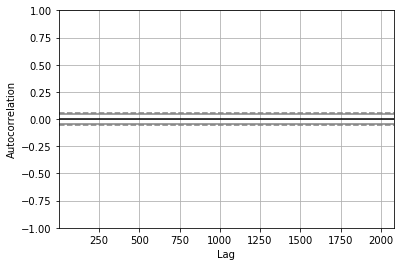

In [174]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(price)
plt.show()

In [175]:
df4=scaled_df1.drop([ind_close],axis=1)

In [176]:
df4.shape

(2079, 18)

In [177]:
#At this point the data is transformed and without written labels, which is confusing, but that's ok.
df4

1         2         3         4         5         6         7   \
0     0.390587  0.387531  0.381158  0.395163  0.472448  0.333850  0.201384   
1     0.386810  0.385179  0.384914  0.324666  0.453914  0.353074  0.259348   
2     0.386770  0.386832  0.377421  0.521195  0.443273  0.354228  0.151783   
3     0.368489  0.375969  0.369219  0.565825  0.430205  0.360664  0.284437   
4     0.382801  0.378103  0.370363  0.482735  0.438717  0.408185  0.265789   
5     0.375392  0.376276  0.373598  0.480365  0.427267  0.391753  0.279823   
6     0.377658  0.376022  0.366053  0.568194  0.427821  0.375788  0.165433   
7     0.369489  0.369990  0.367946  0.505946  0.421285  0.349781  0.271460   
8     0.359669  0.357177  0.351698  0.693802  0.411245  0.345729  0.238489   
9     0.349500  0.362560  0.344077  0.569361  0.396969  0.277472  0.290589   
10    0.370536  0.373794  0.363982  0.630387  0.411524  0.390354  0.292704   
11    0.386324  0.381672  0.380560  0.558795  0.437201  0.539156  0.164760   
12    0.388716  0.385359  0.383132  0.459194  0.460645  0.580547  0.064789   
13    0.376509  0.382714  0.369350  0.483399  0.481314  0.622726  0.080361   
14    0.390987  0.391914  0.387356  0.534590  0.512474  0.693431  0.239450   
15    0.389769  0.382458  0.375146  0.514804  0.542880  0.816030  0.109872   
16    0.370029  0.369082  0.375324  0.373051  0.546928  0.631621  0.269730   
17    0.383774  0.377980  0.371305  0.388837  0.555723  0.587180  0.074978   
18    0.369569  0.380061  0.372635  0.499019  0.547261  0.472206  0.211862   
19    0.379788  0.385661  0.380145  0.451168  0.563477  0.571567  0.241757   
20    0.390983  0.386063  0.381104  0.423383  0.593173  0.741070  0.167740   
21    0.392106  0.385548  0.385254  0.443245  0.605410  0.684774  0.146881   
22    0.385954  0.378836  0.380565  0.431305  0.610986  0.584934  0.118235   
23    0.380680  0.393385  0.377206  0.165690  0.608194  0.455119  0.089974   
24    0.400028  0.397928  0.391311  0.521587  0.633295  0.695696  0.309430   
25    0.398089  0.390837  0.386204  0.360808  0.656935  0.770179  0.115255   
26    0.384655  0.398425  0.384763  0.326469  0.659148  0.612775  0.203980   
27    0.399956  0.405250  0.400240  0.415792  0.683488  0.723846  0.308180   
28    0.406846  0.399656  0.396424  0.381117  0.709383  0.824650  0.173604   
29    0.404797  0.401198  0.396157  0.433693  0.718156  0.725362  0.153802   
...        ...       ...       ...       ...       ...       ...       ...   
2049  0.995104  0.994466  0.985971  0.229139  0.822035  0.606225  0.078920   
2050  0.999243  1.000000  0.993140  0.254846  0.815226  0.590549  0.052965   
2051  0.995792  0.993821  0.984441  0.243601  0.811757  0.766921  0.068250   
2052  0.987952  0.988696  0.983443  0.232734  0.799473  0.387412  0.115063   
2053  0.990372  0.995904  0.978731  0.271651  0.786617  0.275205  0.053638   
2054  0.987110  0.992920  0.985212  0.204685  0.773125  0.297682  0.229453   
2055  0.993162  0.992009  0.984187  0.225526  0.770065  0.468118  0.103432   
2056  0.989248  0.986335  0.978196  0.298440  0.763830  0.422824  0.078631   
2057  0.988069  0.986485  0.974934  0.264855  0.754515  0.286282  0.106604   
2058  0.992162  0.994053  0.985846  0.259110  0.746600  0.301973  0.122945   
2059  0.989740  0.989994  0.979837  0.300626  0.746591  0.589139  0.099298   
2060  0.992105  0.990864  0.982463  0.288136  0.750866  0.664893  0.074882   
2061  0.996377  0.994819  1.000000  0.251574  0.753471  0.680973  0.049217   
2062  0.987288  0.984207  0.967147  0.337188  0.751427  0.620261  0.047967   
2063  0.949703  0.974753  0.950623  0.308300  0.710279  0.049615  0.478804   
2064  0.969377  0.966169  0.951384  0.321077  0.700781  0.248848  0.389311   
2065  0.960872  0.966617  0.952819  0.328829  0.670036  0.222078  0.337307   
2066  0.959211  0.973295  0.954446  0.300547  0.645448  0.291745  0.170624   
2067  0.972143  0.968955  0.961610  0.418746  0.642555  0.404237  0.242911   
2068  0.970489  0.973726  0.964724

In [178]:
#Importing the keras library to start constructing the LSTM network
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [179]:
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

In [180]:
df4=scaled_df1.drop([ind_close],axis=1)

In [181]:
df4

1         2         3         4         5         6         7   \
0     0.390587  0.387531  0.381158  0.395163  0.472448  0.333850  0.201384   
1     0.386810  0.385179  0.384914  0.324666  0.453914  0.353074  0.259348   
2     0.386770  0.386832  0.377421  0.521195  0.443273  0.354228  0.151783   
3     0.368489  0.375969  0.369219  0.565825  0.430205  0.360664  0.284437   
4     0.382801  0.378103  0.370363  0.482735  0.438717  0.408185  0.265789   
5     0.375392  0.376276  0.373598  0.480365  0.427267  0.391753  0.279823   
6     0.377658  0.376022  0.366053  0.568194  0.427821  0.375788  0.165433   
7     0.369489  0.369990  0.367946  0.505946  0.421285  0.349781  0.271460   
8     0.359669  0.357177  0.351698  0.693802  0.411245  0.345729  0.238489   
9     0.349500  0.362560  0.344077  0.569361  0.396969  0.277472  0.290589   
10    0.370536  0.373794  0.363982  0.630387  0.411524  0.390354  0.292704   
11    0.386324  0.381672  0.380560  0.558795  0.437201  0.539156  0.164760   
12    0.388716  0.385359  0.383132  0.459194  0.460645  0.580547  0.064789   
13    0.376509  0.382714  0.369350  0.483399  0.481314  0.622726  0.080361   
14    0.390987  0.391914  0.387356  0.534590  0.512474  0.693431  0.239450   
15    0.389769  0.382458  0.375146  0.514804  0.542880  0.816030  0.109872   
16    0.370029  0.369082  0.375324  0.373051  0.546928  0.631621  0.269730   
17    0.383774  0.377980  0.371305  0.388837  0.555723  0.587180  0.074978   
18    0.369569  0.380061  0.372635  0.499019  0.547261  0.472206  0.211862   
19    0.379788  0.385661  0.380145  0.451168  0.563477  0.571567  0.241757   
20    0.390983  0.386063  0.381104  0.423383  0.593173  0.741070  0.167740   
21    0.392106  0.385548  0.385254  0.443245  0.605410  0.684774  0.146881   
22    0.385954  0.378836  0.380565  0.431305  0.610986  0.584934  0.118235   
23    0.380680  0.393385  0.377206  0.165690  0.608194  0.455119  0.089974   
24    0.400028  0.397928  0.391311  0.521587  0.633295  0.695696  0.309430   
25    0.398089  0.390837  0.386204  0.360808  0.656935  0.770179  0.115255   
26    0.384655  0.398425  0.384763  0.326469  0.659148  0.612775  0.203980   
27    0.399956  0.405250  0.400240  0.415792  0.683488  0.723846  0.308180   
28    0.406846  0.399656  0.396424  0.381117  0.709383  0.824650  0.173604   
29    0.404797  0.401198  0.396157  0.433693  0.718156  0.725362  0.153802   
...        ...       ...       ...       ...       ...       ...       ...   
2049  0.995104  0.994466  0.985971  0.229139  0.822035  0.606225  0.078920   
2050  0.999243  1.000000  0.993140  0.254846  0.815226  0.590549  0.052965   
2051  0.995792  0.993821  0.984441  0.243601  0.811757  0.766921  0.068250   
2052  0.987952  0.988696  0.983443  0.232734  0.799473  0.387412  0.115063   
2053  0.990372  0.995904  0.978731  0.271651  0.786617  0.275205  0.053638   
2054  0.987110  0.992920  0.985212  0.204685  0.773125  0.297682  0.229453   
2055  0.993162  0.992009  0.984187  0.225526  0.770065  0.468118  0.103432   
2056  0.989248  0.986335  0.978196  0.298440  0.763830  0.422824  0.078631   
2057  0.988069  0.986485  0.974934  0.264855  0.754515  0.286282  0.106604   
2058  0.992162  0.994053  0.985846  0.259110  0.746600  0.301973  0.122945   
2059  0.989740  0.989994  0.979837  0.300626  0.746591  0.589139  0.099298   
2060  0.992105  0.990864  0.982463  0.288136  0.750866  0.664893  0.074882   
2061  0.996377  0.994819  1.000000  0.251574  0.753471  0.680973  0.049217   
2062  0.987288  0.984207  0.967147  0.337188  0.751427  0.620261  0.047967   
2063  0.949703  0.974753  0.950623  0.308300  0.710279  0.049615  0.478804   
2064  0.969377  0.966169  0.951384  0.321077  0.700781  0.248848  0.389311   
2065  0.960872  0.966617  0.952819  0.328829  0.670036  0.222078  0.337307   
2066  0.959211  0.973295  0.954446  0.300547  0.645448  0.291745  0.170624   
2067  0.972143  0.968955  0.961610  0.418746  0.642555  0.404237  0.242911   
2068  0.970489  0.973726  0.964724

In [182]:
price=pd.Series(price)
price

0       0.377258
1       0.388233
2       0.381215
3       0.385738
4       0.366512
5       0.380697
6       0.371484
7       0.366191
8       0.357316
9       0.362602
10      0.372517
11      0.382531
12      0.382080
13      0.384087
14      0.387527
15      0.371929
16      0.375388
17      0.367377
18      0.386485
19      0.389319
20      0.378132
21      0.385181
22      0.377691
23      0.393313
24      0.396169
25      0.383489
26      0.403537
27      0.405595
28      0.395170
29      0.399554
          ...   
2049    0.987842
2050    0.990665
2051    0.984658
2052    0.982690
2053    0.981891
2054    0.989407
2055    0.985411
2056    0.981985
2057    0.981479
2058    0.987524
2059    0.984809
2060    0.984597
2061    1.000000
2062    0.964549
2063    0.974445
2064    0.953224
2065    0.954079
2066    0.968322
2067    0.964275
2068    0.964248
2069    0.958669
2070    0.974151
2071    0.978788
2072    0.970510
2073    0.972134
2074    0.981300
2075    0.985129
2076    0.9717

In [183]:
g=df4.values

In [184]:
g.shape

(2079, 18)

In [185]:
#Splitting training/testing data
n_train = g.shape[0]*17//20
exp_X_train=g[:n_train,:]
exp_X_test=g[n_train:,:]
print(exp_X_train.shape,exp_X_test.shape)

(1767, 18) (312, 18)


In [186]:
h=price.values

In [187]:
exp_y_train=h[:n_train]
exp_y_test=h[n_train:]
print(exp_y_train.shape, exp_y_test.shape)

(1767,) (312,)


In [188]:
X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=exp_y_train
y_test=exp_y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1767, 1, 18) (312, 1, 18) (1767,) (312,)


In [189]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [190]:
#Creating the neural network architecture described in the paper
neurons=60
dropout=0.20
model1 = Sequential()
model1.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*2, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*4, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons, activation='sigmoid'))
model1.add(Dense(units=1))
model1.add(Activation('sigmoid'))
model1.compile(loss='mse', optimizer='adam', metrics=[rmse])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 60)             18960     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 240)            346560    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 240)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60)               

Epoch 1/5000
1767/1767 [==============================] - 3s 2ms/step - loss: 0.0785 - rmse: 0.2436
Epoch 2/5000
1767/1767 [==============================] - 1s 366us/step - loss: 0.0919 - rmse: 0.2659
Epoch 3/5000
1767/1767 [==============================] - 1s 493us/step - loss: 0.0747 - rmse: 0.2331
Epoch 4/5000
1767/1767 [==============================] - 1s 406us/step - loss: 0.0705 - rmse: 0.2259
Epoch 5/5000
1767/1767 [==============================] - 1s 527us/step - loss: 0.0694 - rmse: 0.2240
Epoch 6/5000
1767/1767 [==============================] - 1s 499us/step - loss: 0.0680 - rmse: 0.2213
Epoch 7/5000
1767/1767 [==============================] - 1s 335us/step - loss: 0.0670 - rmse: 0.2194
Epoch 8/5000
1767/1767 [==============================] - 1s 331us/step - loss: 0.0662 - rmse: 0.2179
Epoch 9/5000
1767/1767 [==============================] - 1s 328us/step - loss: 0.0657 - rmse: 0.2172
Epoch 10/5000
1767/1767 [==============================] - 1s 358us/step - loss: 0.0

1767/1767 [==============================] - 1s 378us/step - loss: 0.0047 - rmse: 0.0552
Epoch 159/5000
1767/1767 [==============================] - 1s 538us/step - loss: 0.0044 - rmse: 0.0537
Epoch 160/5000
1767/1767 [==============================] - 1s 556us/step - loss: 0.0046 - rmse: 0.0555
Epoch 161/5000
1767/1767 [==============================] - 1s 670us/step - loss: 0.0048 - rmse: 0.0568
Epoch 162/5000
1767/1767 [==============================] - 1s 759us/step - loss: 0.0044 - rmse: 0.0534
Epoch 163/5000
1767/1767 [==============================] - 1s 682us/step - loss: 0.0048 - rmse: 0.0568
Epoch 164/5000
1767/1767 [==============================] - 1s 582us/step - loss: 0.0045 - rmse: 0.0550
Epoch 165/5000
1767/1767 [==============================] - 1s 484us/step - loss: 0.0048 - rmse: 0.0561
Epoch 166/5000
1767/1767 [==============================] - 1s 410us/step - loss: 0.0048 - rmse: 0.0565
Epoch 167/5000
1767/1767 [==============================] - 1s 346us/step - los

1767/1767 [==============================] - 1s 291us/step - loss: 0.0018 - rmse: 0.0340
Epoch 315/5000
1767/1767 [==============================] - 0s 277us/step - loss: 0.0020 - rmse: 0.0356
Epoch 316/5000
1767/1767 [==============================] - 0s 248us/step - loss: 0.0019 - rmse: 0.0345
Epoch 317/5000
1767/1767 [==============================] - 0s 256us/step - loss: 0.0018 - rmse: 0.0337
Epoch 318/5000
1767/1767 [==============================] - 1s 333us/step - loss: 0.0020 - rmse: 0.0360
Epoch 319/5000
1767/1767 [==============================] - 1s 316us/step - loss: 0.0018 - rmse: 0.0334
Epoch 320/5000
1767/1767 [==============================] - 1s 296us/step - loss: 0.0020 - rmse: 0.0353
Epoch 321/5000
1767/1767 [==============================] - 1s 296us/step - loss: 0.0018 - rmse: 0.0337
Epoch 322/5000
1767/1767 [==============================] - 1s 313us/step - loss: 0.0018 - rmse: 0.0335
Epoch 323/5000
1767/1767 [==============================] - 1s 293us/step - los

1767/1767 [==============================] - 0s 246us/step - loss: 9.9578e-04 - rmse: 0.0250
Epoch 471/5000
1767/1767 [==============================] - 0s 259us/step - loss: 0.0012 - rmse: 0.0267
Epoch 472/5000
1767/1767 [==============================] - 0s 239us/step - loss: 0.0011 - rmse: 0.0264
Epoch 473/5000
1767/1767 [==============================] - 0s 261us/step - loss: 0.0011 - rmse: 0.0260
Epoch 474/5000
1767/1767 [==============================] - 0s 248us/step - loss: 0.0011 - rmse: 0.0266
Epoch 475/5000
1767/1767 [==============================] - 1s 286us/step - loss: 0.0011 - rmse: 0.0256
Epoch 476/5000
1767/1767 [==============================] - 1s 300us/step - loss: 0.0011 - rmse: 0.0263
Epoch 477/5000
1767/1767 [==============================] - 1s 312us/step - loss: 0.0011 - rmse: 0.0265
Epoch 478/5000
1767/1767 [==============================] - 0s 266us/step - loss: 0.0011 - rmse: 0.0255
Epoch 479/5000
1767/1767 [==============================] - 0s 257us/step -

1767/1767 [==============================] - 1s 284us/step - loss: 9.9533e-04 - rmse: 0.0249
Epoch 548/5000
1767/1767 [==============================] - 1s 293us/step - loss: 8.1325e-04 - rmse: 0.0224
Epoch 549/5000
1767/1767 [==============================] - 1s 312us/step - loss: 8.7907e-04 - rmse: 0.0229
Epoch 550/5000
1767/1767 [==============================] - 1s 417us/step - loss: 9.0014e-04 - rmse: 0.0237
Epoch 551/5000
1767/1767 [==============================] - 1s 331us/step - loss: 7.8890e-04 - rmse: 0.0218
Epoch 552/5000
1767/1767 [==============================] - 1s 313us/step - loss: 9.5744e-04 - rmse: 0.0244
Epoch 553/5000
1767/1767 [==============================] - 1s 307us/step - loss: 8.6638e-04 - rmse: 0.0228
Epoch 554/5000
1767/1767 [==============================] - 1s 323us/step - loss: 8.5067e-04 - rmse: 0.0230
Epoch 555/5000
1767/1767 [==============================] - 1s 333us/step - loss: 9.9918e-04 - rmse: 0.0247
Epoch 556/5000
1767/1767 [=================

1767/1767 [==============================] - 0s 248us/step - loss: 7.7992e-04 - rmse: 0.0222
Epoch 624/5000
1767/1767 [==============================] - 1s 288us/step - loss: 7.8917e-04 - rmse: 0.0218
Epoch 625/5000
1767/1767 [==============================] - 1s 302us/step - loss: 7.3134e-04 - rmse: 0.0211
Epoch 626/5000
1767/1767 [==============================] - 1s 296us/step - loss: 7.5813e-04 - rmse: 0.0215
Epoch 627/5000
1767/1767 [==============================] - 0s 261us/step - loss: 8.2045e-04 - rmse: 0.0224
Epoch 628/5000
1767/1767 [==============================] - 0s 247us/step - loss: 7.4398e-04 - rmse: 0.0214
Epoch 629/5000
1767/1767 [==============================] - 0s 246us/step - loss: 7.0347e-04 - rmse: 0.0207
Epoch 630/5000
1767/1767 [==============================] - 0s 267us/step - loss: 8.8010e-04 - rmse: 0.0235
Epoch 631/5000
1767/1767 [==============================] - 0s 245us/step - loss: 8.4069e-04 - rmse: 0.0225
Epoch 632/5000
1767/1767 [=================

1767/1767 [==============================] - 1s 441us/step - loss: 6.8306e-04 - rmse: 0.0202
Epoch 776/5000
1767/1767 [==============================] - 1s 302us/step - loss: 7.0496e-04 - rmse: 0.0208
Epoch 777/5000
1767/1767 [==============================] - 1s 292us/step - loss: 7.9932e-04 - rmse: 0.0221
Epoch 778/5000
1767/1767 [==============================] - 1s 534us/step - loss: 6.1532e-04 - rmse: 0.0194
Epoch 779/5000
1767/1767 [==============================] - 1s 435us/step - loss: 0.0012 - rmse: 0.0276
Epoch 780/5000
1767/1767 [==============================] - 1s 352us/step - loss: 0.0011 - rmse: 0.0261
Epoch 781/5000
1767/1767 [==============================] - 1s 369us/step - loss: 0.0016 - rmse: 0.0314
Epoch 782/5000
1767/1767 [==============================] - 1s 310us/step - loss: 9.6254e-04 - rmse: 0.0245
Epoch 783/5000
1767/1767 [==============================] - 1s 293us/step - loss: 8.2579e-04 - rmse: 0.0226
Epoch 784/5000
1767/1767 [=============================

1767/1767 [==============================] - 1s 333us/step - loss: 6.0699e-04 - rmse: 0.0191
Epoch 927/5000
1767/1767 [==============================] - 1s 319us/step - loss: 5.6726e-04 - rmse: 0.0185
Epoch 928/5000
1767/1767 [==============================] - 0s 277us/step - loss: 5.5536e-04 - rmse: 0.0184
Epoch 929/5000
1767/1767 [==============================] - 1s 348us/step - loss: 6.1737e-04 - rmse: 0.0192
Epoch 930/5000
1767/1767 [==============================] - 0s 275us/step - loss: 5.4592e-04 - rmse: 0.0183
Epoch 931/5000
1767/1767 [==============================] - 0s 272us/step - loss: 5.9812e-04 - rmse: 0.0194
Epoch 932/5000
1767/1767 [==============================] - 0s 263us/step - loss: 6.2191e-04 - rmse: 0.0193
Epoch 933/5000
1767/1767 [==============================] - 0s 246us/step - loss: 5.4532e-04 - rmse: 0.0180
Epoch 934/5000
1767/1767 [==============================] - 0s 246us/step - loss: 6.1967e-04 - rmse: 0.0195
Epoch 935/5000
1767/1767 [=================

1767/1767 [==============================] - 0s 242us/step - loss: 6.1293e-04 - rmse: 0.0196
Epoch 1003/5000
1767/1767 [==============================] - 0s 251us/step - loss: 6.8338e-04 - rmse: 0.0202
Epoch 1004/5000
1767/1767 [==============================] - 0s 244us/step - loss: 6.6089e-04 - rmse: 0.0205
Epoch 1005/5000
1767/1767 [==============================] - 0s 247us/step - loss: 0.0011 - rmse: 0.0257
Epoch 1006/5000
1767/1767 [==============================] - 0s 234us/step - loss: 8.0829e-04 - rmse: 0.0222
Epoch 1007/5000
1767/1767 [==============================] - 0s 249us/step - loss: 6.7918e-04 - rmse: 0.0204
Epoch 1008/5000
1767/1767 [==============================] - 0s 262us/step - loss: 6.3644e-04 - rmse: 0.0197
Epoch 1009/5000
1767/1767 [==============================] - 0s 268us/step - loss: 5.9141e-04 - rmse: 0.0193
Epoch 1010/5000
1767/1767 [==============================] - 0s 258us/step - loss: 0.0011 - rmse: 0.0259
Epoch 1011/5000
1767/1767 [================

1767/1767 [==============================] - 0s 264us/step - loss: 7.2515e-04 - rmse: 0.0209
Epoch 1154/5000
1767/1767 [==============================] - 0s 236us/step - loss: 8.0470e-04 - rmse: 0.0231
Epoch 1155/5000
1767/1767 [==============================] - 0s 254us/step - loss: 0.0011 - rmse: 0.0264
Epoch 1156/5000
1767/1767 [==============================] - 0s 233us/step - loss: 9.8867e-04 - rmse: 0.0249
Epoch 1157/5000
1767/1767 [==============================] - 0s 238us/step - loss: 6.7961e-04 - rmse: 0.0204
Epoch 1158/5000
1767/1767 [==============================] - 0s 237us/step - loss: 7.4592e-04 - rmse: 0.0212
Epoch 1159/5000
1767/1767 [==============================] - 0s 235us/step - loss: 8.3546e-04 - rmse: 0.0229
Epoch 1160/5000
1767/1767 [==============================] - 0s 246us/step - loss: 8.3429e-04 - rmse: 0.0228
Epoch 1161/5000
1767/1767 [==============================] - 0s 237us/step - loss: 7.5700e-04 - rmse: 0.0214
Epoch 1162/5000
1767/1767 [============

1767/1767 [==============================] - 1s 320us/step - loss: 0.0015 - rmse: 0.0309
Epoch 1306/5000
1767/1767 [==============================] - 0s 243us/step - loss: 0.0018 - rmse: 0.0338
Epoch 1307/5000
1767/1767 [==============================] - 1s 290us/step - loss: 0.0016 - rmse: 0.0312
Epoch 1308/5000
1767/1767 [==============================] - 0s 273us/step - loss: 0.0011 - rmse: 0.0265
Epoch 1309/5000
1767/1767 [==============================] - 0s 235us/step - loss: 0.0011 - rmse: 0.0265
Epoch 1310/5000
1767/1767 [==============================] - 0s 245us/step - loss: 0.0012 - rmse: 0.0279
Epoch 1311/5000
1767/1767 [==============================] - 0s 240us/step - loss: 0.0012 - rmse: 0.0277
Epoch 1312/5000
1767/1767 [==============================] - 0s 251us/step - loss: 0.0010 - rmse: 0.0249
Epoch 1313/5000
1767/1767 [==============================] - 0s 243us/step - loss: 7.9023e-04 - rmse: 0.0214
Epoch 1314/5000
1767/1767 [==============================] - 0s 243

1767/1767 [==============================] - 1s 461us/step - loss: 9.2998e-04 - rmse: 0.0239
Epoch 1382/5000
1767/1767 [==============================] - 1s 352us/step - loss: 0.0011 - rmse: 0.0271
Epoch 1383/5000
1767/1767 [==============================] - 1s 543us/step - loss: 0.0013 - rmse: 0.0292
Epoch 1384/5000
1767/1767 [==============================] - 1s 333us/step - loss: 0.0014 - rmse: 0.0306
Epoch 1385/5000
1767/1767 [==============================] - 0s 263us/step - loss: 0.0012 - rmse: 0.0273
Epoch 1386/5000
1767/1767 [==============================] - 1s 321us/step - loss: 8.9321e-04 - rmse: 0.0230
Epoch 1387/5000
1767/1767 [==============================] - 1s 396us/step - loss: 8.4911e-04 - rmse: 0.0233
Epoch 1388/5000
1767/1767 [==============================] - 1s 419us/step - loss: 9.9673e-04 - rmse: 0.0251
Epoch 1389/5000
1767/1767 [==============================] - 1s 386us/step - loss: 0.0010 - rmse: 0.0258
Epoch 1390/5000
1767/1767 [============================

1767/1767 [==============================] - 1s 315us/step - loss: 5.9432e-04 - rmse: 0.0187
Epoch 1533/5000
1767/1767 [==============================] - 1s 507us/step - loss: 6.6312e-04 - rmse: 0.0206
Epoch 1534/5000
1767/1767 [==============================] - 1s 535us/step - loss: 8.3763e-04 - rmse: 0.0226
Epoch 1535/5000
1767/1767 [==============================] - 1s 408us/step - loss: 7.6577e-04 - rmse: 0.0218
Epoch 1536/5000
1767/1767 [==============================] - 1s 547us/step - loss: 7.0357e-04 - rmse: 0.0207
Epoch 1537/5000
1767/1767 [==============================] - 1s 404us/step - loss: 7.1243e-04 - rmse: 0.0207
Epoch 1538/5000
1767/1767 [==============================] - 0s 258us/step - loss: 8.6483e-04 - rmse: 0.0241
Epoch 1539/5000
1767/1767 [==============================] - 0s 245us/step - loss: 0.0012 - rmse: 0.0264
Epoch 1540/5000
1767/1767 [==============================] - 1s 295us/step - loss: 0.0011 - rmse: 0.0270
Epoch 1541/5000
1767/1767 [================

1767/1767 [==============================] - 1s 402us/step - loss: 6.2045e-04 - rmse: 0.0192
Epoch 1683/5000
1767/1767 [==============================] - 1s 356us/step - loss: 6.2238e-04 - rmse: 0.0196
Epoch 1684/5000
1767/1767 [==============================] - 1s 377us/step - loss: 6.7265e-04 - rmse: 0.0201
Epoch 1685/5000
1767/1767 [==============================] - 1s 378us/step - loss: 5.8579e-04 - rmse: 0.0190
Epoch 1686/5000
1767/1767 [==============================] - 1s 424us/step - loss: 6.0586e-04 - rmse: 0.0192
Epoch 1687/5000
1767/1767 [==============================] - 1s 516us/step - loss: 5.2692e-04 - rmse: 0.0175
Epoch 1688/5000
1767/1767 [==============================] - 1s 449us/step - loss: 5.2887e-04 - rmse: 0.0177
Epoch 1689/5000
1767/1767 [==============================] - 1s 506us/step - loss: 5.3045e-04 - rmse: 0.0174
Epoch 1690/5000
1767/1767 [==============================] - 1s 436us/step - loss: 5.2135e-04 - rmse: 0.0175
Epoch 1691/5000
1767/1767 [========

1767/1767 [==============================] - 0s 246us/step - loss: 0.0017 - rmse: 0.0320
Epoch 1833/5000
1767/1767 [==============================] - 0s 245us/step - loss: 0.0017 - rmse: 0.0327
Epoch 1834/5000
1767/1767 [==============================] - 0s 244us/step - loss: 0.0012 - rmse: 0.0274
Epoch 1835/5000
1767/1767 [==============================] - 0s 237us/step - loss: 8.4947e-04 - rmse: 0.0228
Epoch 1836/5000
1767/1767 [==============================] - 0s 248us/step - loss: 9.6606e-04 - rmse: 0.0257
Epoch 1837/5000
1767/1767 [==============================] - 1s 318us/step - loss: 0.0011 - rmse: 0.0268
Epoch 1838/5000
1767/1767 [==============================] - 1s 306us/step - loss: 0.0011 - rmse: 0.0276
Epoch 1839/5000
1767/1767 [==============================] - 1s 312us/step - loss: 9.0404e-04 - rmse: 0.0235
Epoch 1840/5000
1767/1767 [==============================] - 1s 288us/step - loss: 6.5096e-04 - rmse: 0.0193
Epoch 1841/5000
1767/1767 [============================

1767/1767 [==============================] - 0s 281us/step - loss: 4.9765e-04 - rmse: 0.0171
Epoch 1983/5000
1767/1767 [==============================] - 0s 279us/step - loss: 5.1552e-04 - rmse: 0.0175
Epoch 1984/5000
1767/1767 [==============================] - 0s 279us/step - loss: 5.0222e-04 - rmse: 0.0174
Epoch 1985/5000
1767/1767 [==============================] - 0s 267us/step - loss: 5.1989e-04 - rmse: 0.0180
Epoch 1986/5000
1767/1767 [==============================] - 0s 252us/step - loss: 5.5907e-04 - rmse: 0.0181
Epoch 1987/5000
1767/1767 [==============================] - 0s 266us/step - loss: 4.8893e-04 - rmse: 0.0170
Epoch 1988/5000
1767/1767 [==============================] - 0s 271us/step - loss: 4.9493e-04 - rmse: 0.0170
Epoch 1989/5000
1767/1767 [==============================] - 0s 277us/step - loss: 5.1679e-04 - rmse: 0.0171
Epoch 1990/5000
1767/1767 [==============================] - 0s 245us/step - loss: 5.2326e-04 - rmse: 0.0179
Epoch 1991/5000
1767/1767 [========

1767/1767 [==============================] - 0s 256us/step - loss: 4.0936e-04 - rmse: 0.0156
Epoch 2133/5000
1767/1767 [==============================] - 0s 243us/step - loss: 4.2854e-04 - rmse: 0.0157
Epoch 2134/5000
1767/1767 [==============================] - 0s 255us/step - loss: 4.2123e-04 - rmse: 0.0160
Epoch 2135/5000
1767/1767 [==============================] - 0s 243us/step - loss: 5.1259e-04 - rmse: 0.0172
Epoch 2136/5000
1767/1767 [==============================] - 0s 282us/step - loss: 4.6040e-04 - rmse: 0.0165
Epoch 2137/5000
1767/1767 [==============================] - 0s 239us/step - loss: 5.0343e-04 - rmse: 0.0174
Epoch 2138/5000
1767/1767 [==============================] - 0s 257us/step - loss: 4.8490e-04 - rmse: 0.0168
Epoch 2139/5000
1767/1767 [==============================] - 0s 244us/step - loss: 5.2068e-04 - rmse: 0.0179
Epoch 2140/5000
1767/1767 [==============================] - 0s 250us/step - loss: 6.0689e-04 - rmse: 0.0194
Epoch 2141/5000
1767/1767 [========

Epoch 2207/5000
1767/1767 [==============================] - 0s 247us/step - loss: 4.7124e-04 - rmse: 0.0167
Epoch 2208/5000
1767/1767 [==============================] - 0s 274us/step - loss: 4.7992e-04 - rmse: 0.0168
Epoch 2209/5000
1767/1767 [==============================] - 0s 260us/step - loss: 4.6624e-04 - rmse: 0.0166
Epoch 2210/5000
1767/1767 [==============================] - 0s 242us/step - loss: 4.4455e-04 - rmse: 0.0159
Epoch 2211/5000
1767/1767 [==============================] - 0s 247us/step - loss: 4.4065e-04 - rmse: 0.0164
Epoch 2212/5000
1767/1767 [==============================] - 0s 247us/step - loss: 4.8331e-04 - rmse: 0.0170
Epoch 2213/5000
1767/1767 [==============================] - 0s 247us/step - loss: 5.4348e-04 - rmse: 0.0182
Epoch 2214/5000
1767/1767 [==============================] - 1s 330us/step - loss: 5.7907e-04 - rmse: 0.0186
Epoch 2215/5000
1767/1767 [==============================] - 1s 323us/step - loss: 5.4627e-04 - rmse: 0.0180
Epoch 2216/5000
176

1767/1767 [==============================] - 0s 240us/step - loss: 4.8815e-04 - rmse: 0.0171
Epoch 2358/5000
1767/1767 [==============================] - 0s 258us/step - loss: 5.3904e-04 - rmse: 0.0187
Epoch 2359/5000
1767/1767 [==============================] - 0s 265us/step - loss: 6.1002e-04 - rmse: 0.0196
Epoch 2360/5000
1767/1767 [==============================] - 0s 275us/step - loss: 5.8939e-04 - rmse: 0.0193
Epoch 2361/5000
1767/1767 [==============================] - 0s 270us/step - loss: 5.8918e-04 - rmse: 0.0188
Epoch 2362/5000
1767/1767 [==============================] - 0s 260us/step - loss: 5.4650e-04 - rmse: 0.0178
Epoch 2363/5000
1767/1767 [==============================] - 0s 256us/step - loss: 5.4213e-04 - rmse: 0.0186
Epoch 2364/5000
1767/1767 [==============================] - 1s 302us/step - loss: 6.2223e-04 - rmse: 0.0196
Epoch 2365/5000
1767/1767 [==============================] - 1s 287us/step - loss: 6.6411e-04 - rmse: 0.0209
Epoch 2366/5000
1767/1767 [========

1767/1767 [==============================] - 1s 462us/step - loss: 8.6966e-04 - rmse: 0.0229
Epoch 2507/5000
1767/1767 [==============================] - 1s 604us/step - loss: 6.1722e-04 - rmse: 0.0195
Epoch 2508/5000
1767/1767 [==============================] - 1s 486us/step - loss: 4.4497e-04 - rmse: 0.0162
Epoch 2509/5000
1767/1767 [==============================] - 1s 557us/step - loss: 3.8224e-04 - rmse: 0.0148
Epoch 2510/5000
1767/1767 [==============================] - 1s 426us/step - loss: 3.6795e-04 - rmse: 0.0149
Epoch 2511/5000
1767/1767 [==============================] - 1s 367us/step - loss: 3.8123e-04 - rmse: 0.0150
Epoch 2512/5000
1767/1767 [==============================] - 0s 266us/step - loss: 3.9619e-04 - rmse: 0.0150
Epoch 2513/5000
1767/1767 [==============================] - 1s 403us/step - loss: 3.9536e-04 - rmse: 0.0153
Epoch 2514/5000
1767/1767 [==============================] - 1s 330us/step - loss: 3.9451e-04 - rmse: 0.0152
Epoch 2515/5000
1767/1767 [========

1767/1767 [==============================] - 0s 258us/step - loss: 5.1895e-04 - rmse: 0.0173
Epoch 2657/5000
1767/1767 [==============================] - 0s 259us/step - loss: 4.8504e-04 - rmse: 0.0172
Epoch 2658/5000
1767/1767 [==============================] - 0s 265us/step - loss: 5.6286e-04 - rmse: 0.0186
Epoch 2659/5000
1767/1767 [==============================] - 0s 252us/step - loss: 6.8978e-04 - rmse: 0.0216
Epoch 2660/5000
1767/1767 [==============================] - 1s 445us/step - loss: 7.5616e-04 - rmse: 0.0216
Epoch 2661/5000
1767/1767 [==============================] - 1s 398us/step - loss: 6.1223e-04 - rmse: 0.0195
Epoch 2662/5000
1767/1767 [==============================] - 1s 469us/step - loss: 5.1057e-04 - rmse: 0.0175
Epoch 2663/5000
1767/1767 [==============================] - 1s 356us/step - loss: 4.6225e-04 - rmse: 0.0164
Epoch 2664/5000
1767/1767 [==============================] - 1s 358us/step - loss: 4.8728e-04 - rmse: 0.0177
Epoch 2665/5000
1767/1767 [========

1767/1767 [==============================] - 0s 221us/step - loss: 4.7380e-04 - rmse: 0.0169
Epoch 2807/5000
1767/1767 [==============================] - 0s 221us/step - loss: 4.3395e-04 - rmse: 0.0163
Epoch 2808/5000
1767/1767 [==============================] - 0s 243us/step - loss: 4.4100e-04 - rmse: 0.0160
Epoch 2809/5000
1767/1767 [==============================] - 0s 255us/step - loss: 3.9579e-04 - rmse: 0.0151
Epoch 2810/5000
1767/1767 [==============================] - 0s 276us/step - loss: 3.7085e-04 - rmse: 0.0147
Epoch 2811/5000
1767/1767 [==============================] - 0s 282us/step - loss: 3.7293e-04 - rmse: 0.0148
Epoch 2812/5000
1767/1767 [==============================] - 1s 290us/step - loss: 3.9272e-04 - rmse: 0.0155
Epoch 2813/5000
1767/1767 [==============================] - 0s 226us/step - loss: 3.8740e-04 - rmse: 0.0152
Epoch 2814/5000
1767/1767 [==============================] - 0s 210us/step - loss: 3.5166e-04 - rmse: 0.0145
Epoch 2815/5000
1767/1767 [========

1767/1767 [==============================] - 0s 236us/step - loss: 4.6156e-04 - rmse: 0.0170
Epoch 2957/5000
1767/1767 [==============================] - 0s 213us/step - loss: 4.9839e-04 - rmse: 0.0178
Epoch 2958/5000
1767/1767 [==============================] - 0s 216us/step - loss: 5.5834e-04 - rmse: 0.0183
Epoch 2959/5000
1767/1767 [==============================] - 0s 215us/step - loss: 5.7049e-04 - rmse: 0.0187
Epoch 2960/5000
1767/1767 [==============================] - 0s 237us/step - loss: 7.0730e-04 - rmse: 0.0213
Epoch 2961/5000
1767/1767 [==============================] - 0s 263us/step - loss: 9.0914e-04 - rmse: 0.0250
Epoch 2962/5000
1767/1767 [==============================] - 1s 296us/step - loss: 0.0012 - rmse: 0.0289
Epoch 2963/5000
1767/1767 [==============================] - 1s 302us/step - loss: 0.0011 - rmse: 0.0260
Epoch 2964/5000
1767/1767 [==============================] - 1s 347us/step - loss: 6.6244e-04 - rmse: 0.0201
Epoch 2965/5000
1767/1767 [================

1767/1767 [==============================] - 0s 219us/step - loss: 3.5131e-04 - rmse: 0.0144
Epoch 3106/5000
1767/1767 [==============================] - 0s 226us/step - loss: 3.4000e-04 - rmse: 0.0145
Epoch 3107/5000
1767/1767 [==============================] - 0s 221us/step - loss: 3.9264e-04 - rmse: 0.0153
Epoch 3108/5000
1767/1767 [==============================] - 1s 365us/step - loss: 3.5547e-04 - rmse: 0.0143
Epoch 3109/5000
1767/1767 [==============================] - 0s 225us/step - loss: 3.4584e-04 - rmse: 0.0146
Epoch 3110/5000
1767/1767 [==============================] - 1s 292us/step - loss: 3.8934e-04 - rmse: 0.0155
Epoch 3111/5000
1767/1767 [==============================] - 1s 312us/step - loss: 4.1690e-04 - rmse: 0.0161
Epoch 3112/5000
1767/1767 [==============================] - 0s 268us/step - loss: 4.8361e-04 - rmse: 0.0173
Epoch 3113/5000
1767/1767 [==============================] - 1s 331us/step - loss: 5.1237e-04 - rmse: 0.0175
Epoch 3114/5000
1767/1767 [========

1767/1767 [==============================] - 1s 348us/step - loss: 3.2115e-04 - rmse: 0.0137
Epoch 3254/5000
1767/1767 [==============================] - 1s 324us/step - loss: 3.4317e-04 - rmse: 0.0142
Epoch 3255/5000
1767/1767 [==============================] - 1s 420us/step - loss: 3.3479e-04 - rmse: 0.0143
Epoch 3256/5000
1767/1767 [==============================] - 1s 359us/step - loss: 3.6240e-04 - rmse: 0.0147
Epoch 3257/5000
1767/1767 [==============================] - 1s 315us/step - loss: 3.5096e-04 - rmse: 0.0146
Epoch 3258/5000
1767/1767 [==============================] - 1s 297us/step - loss: 3.8425e-04 - rmse: 0.0152
Epoch 3259/5000
1767/1767 [==============================] - 1s 296us/step - loss: 3.5669e-04 - rmse: 0.0143
Epoch 3260/5000
1767/1767 [==============================] - 1s 519us/step - loss: 3.1990e-04 - rmse: 0.0138
Epoch 3261/5000
1767/1767 [==============================] - 1s 463us/step - loss: 3.4375e-04 - rmse: 0.0141
Epoch 3262/5000
1767/1767 [========

Epoch 3328/5000
1767/1767 [==============================] - 0s 249us/step - loss: 3.3716e-04 - rmse: 0.0141
Epoch 3329/5000
1767/1767 [==============================] - 0s 252us/step - loss: 3.1537e-04 - rmse: 0.0139
Epoch 3330/5000
1767/1767 [==============================] - 1s 293us/step - loss: 3.4330e-04 - rmse: 0.0141
Epoch 3331/5000
1767/1767 [==============================] - 1s 301us/step - loss: 3.2546e-04 - rmse: 0.0142
Epoch 3332/5000
1767/1767 [==============================] - 1s 284us/step - loss: 3.4566e-04 - rmse: 0.0143
Epoch 3333/5000
1767/1767 [==============================] - 0s 282us/step - loss: 3.2383e-04 - rmse: 0.0138
Epoch 3334/5000
1767/1767 [==============================] - 0s 240us/step - loss: 3.3865e-04 - rmse: 0.0139
Epoch 3335/5000
1767/1767 [==============================] - 0s 250us/step - loss: 3.0751e-04 - rmse: 0.0133
Epoch 3336/5000
1767/1767 [==============================] - 0s 250us/step - loss: 3.3309e-04 - rmse: 0.0141
Epoch 3337/5000
176

Epoch 3403/5000
1767/1767 [==============================] - 1s 449us/step - loss: 2.8904e-04 - rmse: 0.0130
Epoch 3404/5000
1767/1767 [==============================] - 1s 583us/step - loss: 2.9870e-04 - rmse: 0.0134
Epoch 3405/5000
1767/1767 [==============================] - 1s 537us/step - loss: 3.1885e-04 - rmse: 0.0135
Epoch 3406/5000
1767/1767 [==============================] - 1s 456us/step - loss: 3.4105e-04 - rmse: 0.0145
Epoch 3407/5000
1767/1767 [==============================] - 1s 436us/step - loss: 3.7128e-04 - rmse: 0.0150
Epoch 3408/5000
1767/1767 [==============================] - 1s 411us/step - loss: 3.9530e-04 - rmse: 0.0156
Epoch 3409/5000
1767/1767 [==============================] - 1s 398us/step - loss: 3.6534e-04 - rmse: 0.0148
Epoch 3410/5000
1767/1767 [==============================] - 1s 413us/step - loss: 3.6198e-04 - rmse: 0.0145
Epoch 3411/5000
1767/1767 [==============================] - 1s 394us/step - loss: 4.5698e-04 - rmse: 0.0172
Epoch 3412/5000
176

1767/1767 [==============================] - 1s 352us/step - loss: 3.1799e-04 - rmse: 0.0135
Epoch 3554/5000
1767/1767 [==============================] - 1s 330us/step - loss: 3.0926e-04 - rmse: 0.0136
Epoch 3555/5000
1767/1767 [==============================] - 1s 347us/step - loss: 2.8218e-04 - rmse: 0.0129
Epoch 3556/5000
1767/1767 [==============================] - 1s 326us/step - loss: 3.0778e-04 - rmse: 0.0134
Epoch 3557/5000
1767/1767 [==============================] - 1s 295us/step - loss: 2.9692e-04 - rmse: 0.0132
Epoch 3558/5000
1767/1767 [==============================] - 1s 367us/step - loss: 3.1293e-04 - rmse: 0.0134
Epoch 3559/5000
1767/1767 [==============================] - 0s 281us/step - loss: 3.1437e-04 - rmse: 0.0138
Epoch 3560/5000
1767/1767 [==============================] - 1s 356us/step - loss: 3.2605e-04 - rmse: 0.0137
Epoch 3561/5000
1767/1767 [==============================] - 1s 337us/step - loss: 3.1792e-04 - rmse: 0.0139
Epoch 3562/5000
1767/1767 [========

1767/1767 [==============================] - 0s 252us/step - loss: 3.0413e-04 - rmse: 0.0132
Epoch 3704/5000
1767/1767 [==============================] - 0s 247us/step - loss: 2.7121e-04 - rmse: 0.0128
Epoch 3705/5000
1767/1767 [==============================] - 0s 240us/step - loss: 3.1830e-04 - rmse: 0.0140
Epoch 3706/5000
1767/1767 [==============================] - 0s 262us/step - loss: 3.2956e-04 - rmse: 0.0143
Epoch 3707/5000
1767/1767 [==============================] - 0s 245us/step - loss: 3.6265e-04 - rmse: 0.0147
Epoch 3708/5000
1767/1767 [==============================] - 0s 251us/step - loss: 3.0613e-04 - rmse: 0.0132
Epoch 3709/5000
1767/1767 [==============================] - 0s 238us/step - loss: 3.3171e-04 - rmse: 0.0142
Epoch 3710/5000
1767/1767 [==============================] - 0s 243us/step - loss: 3.5449e-04 - rmse: 0.0143
Epoch 3711/5000
1767/1767 [==============================] - 0s 248us/step - loss: 3.8964e-04 - rmse: 0.0160
Epoch 3712/5000
1767/1767 [========

1767/1767 [==============================] - 0s 244us/step - loss: 3.8404e-04 - rmse: 0.0151
Epoch 3854/5000
1767/1767 [==============================] - 0s 236us/step - loss: 3.4488e-04 - rmse: 0.0143
Epoch 3855/5000
1767/1767 [==============================] - 0s 248us/step - loss: 3.2123e-04 - rmse: 0.0140
Epoch 3856/5000
1767/1767 [==============================] - 0s 247us/step - loss: 3.3235e-04 - rmse: 0.0144
Epoch 3857/5000
1767/1767 [==============================] - 0s 235us/step - loss: 3.4784e-04 - rmse: 0.0145
Epoch 3858/5000
1767/1767 [==============================] - 0s 255us/step - loss: 3.4972e-04 - rmse: 0.0146
Epoch 3859/5000
1767/1767 [==============================] - 0s 269us/step - loss: 3.3534e-04 - rmse: 0.0140
Epoch 3860/5000
1767/1767 [==============================] - 0s 263us/step - loss: 3.2609e-04 - rmse: 0.0140
Epoch 3861/5000
1767/1767 [==============================] - 0s 251us/step - loss: 3.0280e-04 - rmse: 0.0135
Epoch 3862/5000
1767/1767 [========

1767/1767 [==============================] - 1s 367us/step - loss: 4.3697e-04 - rmse: 0.0167
Epoch 4004/5000
1767/1767 [==============================] - 1s 298us/step - loss: 4.1932e-04 - rmse: 0.0160
Epoch 4005/5000
1767/1767 [==============================] - 0s 263us/step - loss: 3.9681e-04 - rmse: 0.0152
Epoch 4006/5000
1767/1767 [==============================] - 0s 275us/step - loss: 4.3153e-04 - rmse: 0.0166
Epoch 4007/5000
1767/1767 [==============================] - 0s 247us/step - loss: 5.3057e-04 - rmse: 0.0184
Epoch 4008/5000
1767/1767 [==============================] - 1s 329us/step - loss: 5.9034e-04 - rmse: 0.0201
Epoch 4009/5000
1767/1767 [==============================] - 1s 290us/step - loss: 5.7536e-04 - rmse: 0.0188
Epoch 4010/5000
1767/1767 [==============================] - 1s 307us/step - loss: 4.3787e-04 - rmse: 0.0163
Epoch 4011/5000
1767/1767 [==============================] - 0s 263us/step - loss: 4.1965e-04 - rmse: 0.0160
Epoch 4012/5000
1767/1767 [========

1767/1767 [==============================] - 1s 395us/step - loss: 2.6653e-04 - rmse: 0.0126
Epoch 4154/5000
1767/1767 [==============================] - 1s 337us/step - loss: 2.4974e-04 - rmse: 0.0125
Epoch 4155/5000
1767/1767 [==============================] - 1s 361us/step - loss: 3.1093e-04 - rmse: 0.0135
Epoch 4156/5000
1767/1767 [==============================] - 1s 333us/step - loss: 2.9431e-04 - rmse: 0.0134
Epoch 4157/5000
1767/1767 [==============================] - 0s 270us/step - loss: 3.2422e-04 - rmse: 0.0137
Epoch 4158/5000
1767/1767 [==============================] - 1s 321us/step - loss: 3.0057e-04 - rmse: 0.0134
Epoch 4159/5000
1767/1767 [==============================] - 1s 346us/step - loss: 2.8702e-04 - rmse: 0.0130
Epoch 4160/5000
1767/1767 [==============================] - 1s 300us/step - loss: 2.7206e-04 - rmse: 0.0127
Epoch 4161/5000
1767/1767 [==============================] - 1s 283us/step - loss: 2.8172e-04 - rmse: 0.0131
Epoch 4162/5000
1767/1767 [========

1767/1767 [==============================] - 1s 290us/step - loss: 3.1395e-04 - rmse: 0.0140
Epoch 4304/5000
1767/1767 [==============================] - 1s 321us/step - loss: 3.4163e-04 - rmse: 0.0146
Epoch 4305/5000
1767/1767 [==============================] - 0s 262us/step - loss: 3.5463e-04 - rmse: 0.0146
Epoch 4306/5000
1767/1767 [==============================] - 0s 271us/step - loss: 3.4149e-04 - rmse: 0.0142
Epoch 4307/5000
1767/1767 [==============================] - 0s 262us/step - loss: 3.5017e-04 - rmse: 0.0149
Epoch 4308/5000
1767/1767 [==============================] - 0s 261us/step - loss: 4.4265e-04 - rmse: 0.0169
Epoch 4309/5000
1767/1767 [==============================] - 0s 264us/step - loss: 5.1898e-04 - rmse: 0.0183
Epoch 4310/5000
1767/1767 [==============================] - 0s 248us/step - loss: 5.1467e-04 - rmse: 0.0177
Epoch 4311/5000
1767/1767 [==============================] - 0s 244us/step - loss: 4.0744e-04 - rmse: 0.0157
Epoch 4312/5000
1767/1767 [========

1767/1767 [==============================] - 1s 357us/step - loss: 2.7861e-04 - rmse: 0.0128
Epoch 4454/5000
1767/1767 [==============================] - 1s 309us/step - loss: 2.8033e-04 - rmse: 0.0130
Epoch 4455/5000
1767/1767 [==============================] - 1s 469us/step - loss: 2.8200e-04 - rmse: 0.0130
Epoch 4456/5000
1767/1767 [==============================] - 1s 359us/step - loss: 3.0337e-04 - rmse: 0.0136
Epoch 4457/5000
1767/1767 [==============================] - 1s 360us/step - loss: 3.3453e-04 - rmse: 0.0143
Epoch 4458/5000
1767/1767 [==============================] - 0s 269us/step - loss: 3.3213e-04 - rmse: 0.0139
Epoch 4459/5000
1767/1767 [==============================] - 1s 287us/step - loss: 3.4365e-04 - rmse: 0.0144
Epoch 4460/5000
1767/1767 [==============================] - 1s 291us/step - loss: 3.4647e-04 - rmse: 0.0143
Epoch 4461/5000
1767/1767 [==============================] - 0s 276us/step - loss: 3.7472e-04 - rmse: 0.0154
Epoch 4462/5000
1767/1767 [========

1767/1767 [==============================] - 0s 274us/step - loss: 2.5336e-04 - rmse: 0.0124
Epoch 4529/5000
1767/1767 [==============================] - 0s 275us/step - loss: 2.8970e-04 - rmse: 0.0130
Epoch 4530/5000
1767/1767 [==============================] - 1s 348us/step - loss: 2.8149e-04 - rmse: 0.0130
Epoch 4531/5000
1767/1767 [==============================] - 1s 386us/step - loss: 2.7776e-04 - rmse: 0.0127
Epoch 4532/5000
1767/1767 [==============================] - 1s 338us/step - loss: 2.6184e-04 - rmse: 0.0124
Epoch 4533/5000
1767/1767 [==============================] - 1s 338us/step - loss: 2.5755e-04 - rmse: 0.0124
Epoch 4534/5000
1767/1767 [==============================] - 1s 336us/step - loss: 2.8133e-04 - rmse: 0.0130
Epoch 4535/5000
1767/1767 [==============================] - 1s 355us/step - loss: 2.7780e-04 - rmse: 0.0130
Epoch 4536/5000
1767/1767 [==============================] - 1s 359us/step - loss: 2.7371e-04 - rmse: 0.0129
Epoch 4537/5000
1767/1767 [========

1767/1767 [==============================] - 0s 261us/step - loss: 3.1613e-04 - rmse: 0.0136
Epoch 4679/5000
1767/1767 [==============================] - 0s 249us/step - loss: 3.3079e-04 - rmse: 0.0141
Epoch 4680/5000
1767/1767 [==============================] - 0s 243us/step - loss: 3.4632e-04 - rmse: 0.0145
Epoch 4681/5000
1767/1767 [==============================] - 0s 259us/step - loss: 4.1423e-04 - rmse: 0.0165
Epoch 4682/5000
1767/1767 [==============================] - 0s 245us/step - loss: 4.8702e-04 - rmse: 0.0172
Epoch 4683/5000
1767/1767 [==============================] - 0s 253us/step - loss: 4.4460e-04 - rmse: 0.0166
Epoch 4684/5000
1767/1767 [==============================] - 0s 252us/step - loss: 3.8144e-04 - rmse: 0.0153
Epoch 4685/5000
1767/1767 [==============================] - 1s 302us/step - loss: 3.4428e-04 - rmse: 0.0144
Epoch 4686/5000
1767/1767 [==============================] - 0s 257us/step - loss: 3.9987e-04 - rmse: 0.0163
Epoch 4687/5000
1767/1767 [========

1767/1767 [==============================] - 0s 262us/step - loss: 2.6738e-04 - rmse: 0.0124
Epoch 4828/5000
1767/1767 [==============================] - 0s 257us/step - loss: 2.7128e-04 - rmse: 0.0130
Epoch 4829/5000
1767/1767 [==============================] - 1s 407us/step - loss: 3.0439e-04 - rmse: 0.0137
Epoch 4830/5000
1767/1767 [==============================] - 0s 241us/step - loss: 2.7459e-04 - rmse: 0.0130
Epoch 4831/5000
1767/1767 [==============================] - 0s 242us/step - loss: 2.5999e-04 - rmse: 0.0125
Epoch 4832/5000
1767/1767 [==============================] - 0s 240us/step - loss: 2.5593e-04 - rmse: 0.0122
Epoch 4833/5000
1767/1767 [==============================] - 0s 240us/step - loss: 2.5066e-04 - rmse: 0.0122
Epoch 4834/5000
1767/1767 [==============================] - 1s 322us/step - loss: 2.6239e-04 - rmse: 0.0123
Epoch 4835/5000
1767/1767 [==============================] - 1s 348us/step - loss: 2.5795e-04 - rmse: 0.0125
Epoch 4836/5000
1767/1767 [========

1767/1767 [==============================] - 1s 332us/step - loss: 2.9386e-04 - rmse: 0.0134
Epoch 4903/5000
1767/1767 [==============================] - 1s 318us/step - loss: 3.4588e-04 - rmse: 0.0144
Epoch 4904/5000
1767/1767 [==============================] - 1s 391us/step - loss: 3.8335e-04 - rmse: 0.0159
Epoch 4905/5000
1767/1767 [==============================] - 1s 399us/step - loss: 4.2543e-04 - rmse: 0.0163
Epoch 4906/5000
1767/1767 [==============================] - 1s 380us/step - loss: 3.7972e-04 - rmse: 0.0155
Epoch 4907/5000
1767/1767 [==============================] - 1s 358us/step - loss: 3.3147e-04 - rmse: 0.0142
Epoch 4908/5000
1767/1767 [==============================] - 1s 291us/step - loss: 2.7862e-04 - rmse: 0.0128
Epoch 4909/5000
1767/1767 [==============================] - 1s 389us/step - loss: 2.7294e-04 - rmse: 0.0130
Epoch 4910/5000
1767/1767 [==============================] - 1s 376us/step - loss: 3.0025e-04 - rmse: 0.0135
Epoch 4911/5000
1767/1767 [========

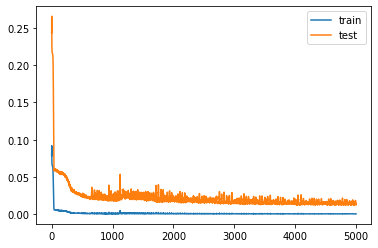

In [191]:
history=model1.fit(X_train,y_train, epochs=5000, shuffle=False,batch_size=60, verbose=1)
model1.save('./models/attempt1.h5')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['rmse'], label='test')
plt.legend()
plt.show()

In [192]:
pred=model1.predict(X_test)
actual= pd.DataFrame(y_test)

In [193]:
#This is the prediction. IT seems to work okay, although I'd mess around with the hyperparameters a bit more
#This was just to see I could implement a research paper on my own, and I was pleased with the results.
#The prediction closely follows, but doesn't match the heights of the peaks.
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.savefig('./prediction.svg')
plt.show()

In [194]:
rescaled_real= scaler.inverse_transform(scaled_df1)

In [ ]:
#So that was a fun exercise! Actually not much fun, the paper was very vague in a lot of key aspects.
#Here's the link again: 
#https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0180944#pone.0180944.ref004

In [198]:
#https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

In [199]:
print(mape_vectorized_v2(actual, pred))

0    0.026111
dtype: float64
